# ****ASSIGNMENT 10**** #

## **RECOMMENDATION SYSTEM** ##

File : book.csv

In [173]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation


palette_color = sns.color_palette('rainbow')
import warnings
warnings.filterwarnings('ignore')

### **Importing data from file book.csv**

In [174]:
# Reading the data from the file 'book.csv'
#book_orig_data = pd.read_csv("book.csv")
book_orig_data = pd.read_csv("book.csv",encoding='latin-1')
book_orig_data

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


### **EDA (Exploratory Data Analysis)**

In [175]:
book_orig_data.shape

(10000, 4)

In [176]:
book_orig_data.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [177]:
# The column 'Unnamed:0' is redundant and needs to be removed
book_data = book_orig_data.drop(['Unnamed: 0'], axis = 1)

In [178]:
book_data.shape

(10000, 3)

#### *Descriptive Analysis* ####

In [179]:
book_data.describe()

,User.ID,Book.Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [180]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


#### *Checking for missing values*

In [181]:
# check for missing values
book_data.isna().sum() # The result shows that there are no missing values

User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

#### *Checking for Null Values*

In [182]:
# Checking to see if there are any null values
# We can get this information using book_data.info() option as well
book_data.isnull().sum() # The result shows that there are no null values

User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

#### *Checking the data structure* ####

In [183]:
# Data Structure
print(type(book_data))
book_data.shape

<class 'pandas.core.frame.DataFrame'>


(10000, 3)

In [184]:
# Checking data types
book_data.dtypes # check data types of all variables

User.ID         int64
Book.Title     object
Book.Rating     int64
dtype: object

In [185]:
# The Unique Titles in 'book_data' are:
print(f"The count of unique titles in 'book_data' are {len(book_data['Book.Title'].unique())}\n")
print(f"The unique titles in 'book_data' are -\n {book_data['Book.Title'].unique()}\n")

The count of unique titles in 'book_data' are 9659

The unique titles in 'book_data' are -
 ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'How to Flirt: A Practical Guide' 'Twilight'
 'Kids Say the Darndest Things']



#### *Rename Columns*

In [186]:
book_data.head(0)

,User.ID,Book.Title,Book.Rating


In [187]:
# Renaming column names
book_data.rename(columns = {'User.ID':'ID','Book.Title':'TITLE','Book.Rating':'RATING'}, inplace = True)
book_data.head()

,ID,TITLE,RATING
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [188]:
book_data.duplicated().sum()

2

In [189]:
book_data[book_data.duplicated()].shape

(2, 3)

In [190]:
book_data[book_data.duplicated()]

,ID,TITLE,RATING
5051,2152,Le nouveau soleil de Teur,7
7439,3757,The Magician's Tale,7


In [191]:
len(book_data['ID'].unique())

2182

In [192]:
(book_data['ID'].value_counts()).shape[0]

2182

In [193]:
book_data['RATING'].value_counts()

RATING
8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: count, dtype: int64

In [194]:
book_data[book_data['RATING']==1]

,ID,TITLE,RATING
115,276853,A Kiss Remembered,1
640,277363,Children of the Night,1
1442,278024,Saucer,1
1717,278202,Catechism of the Catholic Church,1
2107,278540,Anam Cara : A Book of Celtic Wisdom,1
2231,278633,The Selfish Gene,1
2294,278683,Having Our Say: The Delany Sisters' First 100 ...,1
2320,278755,"The Elements of Style, Fourth Edition",1
2321,278759,How to Say It Style Guide,1
3900,1314,Fatal Care,1


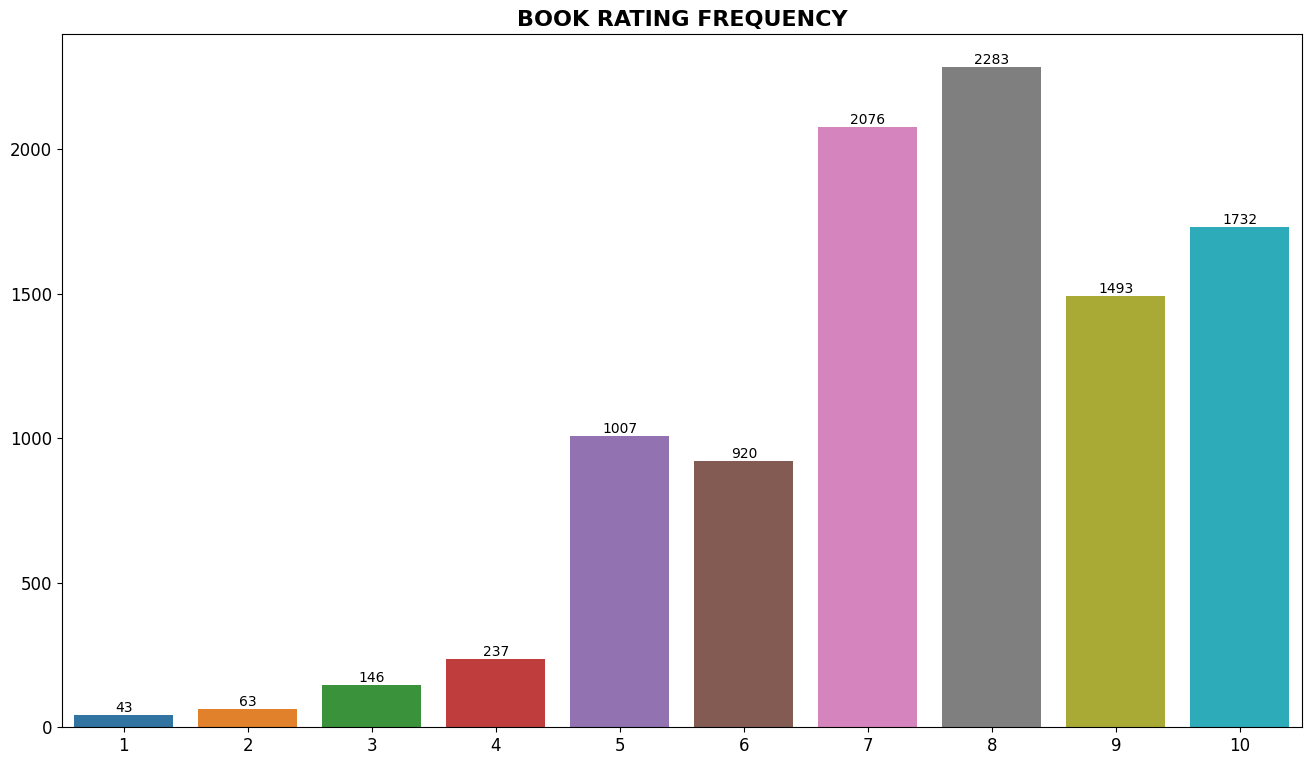

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

palette_color = sns.color_palette('rainbow')[0:7]

# Display state data in a form of Pie Graph
labels = book_data['RATING'].value_counts().keys().tolist()
counts = book_data['RATING'].value_counts().tolist()

plt.figure(figsize = (16,9))
bar_plot = sns.barplot(x = labels, y = counts, data= book_data)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('BOOK RATING FREQUENCY', fontsize = 16, fontweight = 'bold')
for i in bar_plot.containers:
    bar_plot.bar_label(i,)
plt.show()

In [196]:
len(book_data.TITLE.unique())

9659

In [197]:
book_data.TITLE.value_counts()

TITLE
Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: count, Length: 9659, dtype: int64

In [198]:
book_data.head()

,ID,TITLE,RATING
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [199]:
book_data.sort_values('ID')

,ID,TITLE,RATING
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


### **Recommendation based on Cosine Similarity** ###

In [200]:
# # Change structure of dataset so that we can compute the similarity score
book_df = book_data.pivot_table(index='ID', # row = ID
                           columns='TITLE', # col = TITLE
                           values='RATING')
book_df

TITLE,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [201]:
book_df.shape

(2182, 9659)

In [202]:
# Replace all the NaN values with 0 values
book_df.fillna(0, inplace=True)
book_df

TITLE,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [203]:
# Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [204]:
# User similarity - pairwise - taking 2 rows at a time it will compute the distance
# That distance is scaled between 0 to 1
# Suppose distance between 2 rows is 0.  We want similarity, not a distance.
# The similarity is is calculated as - Similarity = 1-distance. So 1-0=1. i.e. similarity in rows is 1.
# Suppose distance is 0.9. So 1-0.9=0.1
user_sim = 1 - pairwise_distances(book_df.values,metric='cosine')

In [205]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [206]:
np.fill_diagonal(user_sim, 0)

In [207]:
# Storing the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
# Setting the index and column names to IDs, similar to a correlation matrix
user_sim_df.index = book_data['ID'].unique()
user_sim_df.columns = book_data['ID'].unique()
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
# idxmax() method returns a Series with the index of the maximum value for each column.
# By specifying the column axis (axis='columns' or 1), the idxmax() method returns a Series with the index of the maximum value for each row.
# Most Similar Users
user_sim_df.idxmax(axis=1)

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

In [210]:
user_sim_df.iloc[0:5, 0:5]
# similarity 1 - between customer 3 to 3, 6 to 6.
# similarity between customer 11 and customer 3 is 1. i.e. they are very similar.

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


#### Extracting the book details based on the ID ####

In [211]:
# Extracing the books details which ID 8, 14, 162109, 162121 & 276736 have read
book_data[(book_data['ID']==8) | (book_data['ID']==14) | (book_data['ID']==162109) | (book_data['ID']==162121) | (book_data['ID']==276736)]

,ID,TITLE,RATING
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
2399,8,Ancient Celtic Romances,5
2400,8,The Western way: A practical guide to the West...,5
2401,8,Wings,5
2402,8,Truckers,5
2403,8,Keepers of the Earth Teachers Guide,6
2404,8,The Celts Activity Book,6
2405,8,The Art Of Celtia,7
2409,14,COPS,5
2410,14,A Cold Heart: An Alex Delaware Novel,5


#### Alternative Method - To extract book details based on the ID ####

In [212]:
# Other way to display above table
user_1=book_data[book_data['ID']==162109] # Book details read by ID '162109'
user_1

,ID,TITLE,RATING
9988,162109,The Flower in the Skull,10


In [213]:
user_2=book_data[book_data['ID']==162121] # Book details read by ID '162121'
user_2

,ID,TITLE,RATING
9990,162121,The Cloister Walk,7
9991,162121,Open Water,5
9992,162121,The Evolution of Jane,8
9993,162121,AT PARADISE GATE,8
9994,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [214]:
user_3=book_data[book_data['ID']==276736] # Book details read by ID '276736'
user_3

,ID,TITLE,RATING
3,276736,Flu: The Story of the Great Influenza Pandemic...,8


In [215]:
user_1.TITLE  # Book title read by customer 162109

9988    The Flower in the Skull
Name: TITLE, dtype: object

In [216]:
user_2.TITLE  # Book title read by customer 162121

9990                                    The Cloister Walk
9991                                           Open Water
9992                                The Evolution of Jane
9993                                     AT PARADISE GATE
9994    I Should Have Stayed Home: The Worst Trips of ...
9995         American Fried: Adventures of a Happy Eater.
9996                                Cannibal In Manhattan
9997                      How to Flirt: A Practical Guide
9998                                             Twilight
Name: TITLE, dtype: object

In [217]:
user_3.TITLE  # Book title read by customer 276736

3    Flu: The Story of the Great Influenza Pandemic...
Name: TITLE, dtype: object

In [218]:
merged = pd.merge(user_1,user_2,on='TITLE',how='outer') # Merge the outputs of user_1 and user_2
merged
merged = pd.merge(merged,user_3,on='TITLE',how='outer') # Merge the outputs to that of user_3
merged

,ID_x,TITLE,RATING_x,ID_y,RATING_y,ID,RATING
0,162109.0,The Flower in the Skull,10.0,NaN,NaN,NaN,NaN
1,NaN,The Cloister Walk,NaN,162121.0,7.0,NaN,NaN
2,NaN,Open Water,NaN,162121.0,5.0,NaN,NaN
3,NaN,The Evolution of Jane,NaN,162121.0,8.0,NaN,NaN
4,NaN,AT PARADISE GATE,NaN,162121.0,8.0,NaN,NaN
5,NaN,I Should Have Stayed Home: The Worst Trips of ...,NaN,162121.0,8.0,NaN,NaN
6,NaN,American Fried: Adventures of a Happy Eater.,NaN,162121.0,7.0,NaN,NaN
7,NaN,Cannibal In Manhattan,NaN,162121.0,9.0,NaN,NaN
8,NaN,How to Flirt: A Practical Guide,NaN,162121.0,7.0,NaN,NaN
9,NaN,Twilight,NaN,162121.0,8.0,NaN,NaN


#### *Recommendation Function* ####

In [219]:
def get_recommendation(ID):
    simID = user_sim_df.loc[ID].idxmax()
    simID_books = book_data[book_data['ID'] == simID].TITLE
    custID_books = book_data[book_data['ID'] == ID].TITLE
    return set(simID_books) - set(custID_books)

##### Testing the Recommendation Function - 1 #####

In [220]:
get_recommendation(3546) # Getting the recommendations for the book_data['ID']==3546; Since it is similar to book_data['ID']==276813, it will show the titles for it

{'From the Corner of His Eye',
 "I'll Be Seeing You",
 'Icebound',
 'Isle of Dogs',
 'Proxies',
 'Purity in Death',
 'This Year It Will Be Different: And Other Stories'}

In [221]:
book_data[book_data['ID']==276813] # Since book_data['ID']==276813 is similar to book_data['ID']==3546, so the recommendation given for 3546 shows the same titles, as dipicted below.

,ID,TITLE,RATING
44,276813,Icebound,8
45,276813,I'll Be Seeing You,8
46,276813,From the Corner of His Eye,6
47,276813,Isle of Dogs,8
48,276813,Purity in Death,6
49,276813,This Year It Will Be Different: And Other Stories,6
50,276813,Proxies,8


In [222]:
# The correlation value in the 'user_sim_df' table is not 0 but greater than 0 and therefore it is similar
user_sim_df.loc[276813,3546] # Greater than 0

0.3086974532565159

##### Testing the Recommendation Function - 2 #####

In [223]:
get_recommendation(276820) # Getting the recommendations for the book_data['ID']==276820

# Since it is similar to book_data['ID']==3462, it will show the titles for it

{'Alchemy and Academe',
 'Convergent Series',
 'Dancers of Arun',
 'PROMETHEUS DESIGN',
 'Star Trek III The Search for Spock (Star Trek, No 17)',
 'Star Trek the New Voyages #2',
 'The Barsoom Project'}

In [224]:
book_data[book_data['ID']==3462] # The book_data['ID']==276820 is similar to book_data['ID']==3462, so the recommendation given for 3462 shows the same titles, as dipicted below.

,ID,TITLE,RATING
6693,3462,Convergent Series,9
6694,3462,The Barsoom Project,9
6695,3462,"Star Trek III The Search for Spock (Star Trek,...",9
6696,3462,Dancers of Arun,8
6697,3462,PROMETHEUS DESIGN,10
6698,3462,Star Trek the New Voyages #2,8
6699,3462,Alchemy and Academe,8


In [225]:
# The correlation value in the 'user_sim_df' table is not 0 but greater than 0 and therefore it is similar
user_sim_df.loc[276820,3462] # Greater than 0

0.7071067811865476